In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix

import os

df = pd.read_csv('./Airlines.csv')
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [34]:
df.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [35]:
df.dtypes

id              int64
Airline        object
Flight          int64
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Time            int64
Length          int64
Delay           int64
dtype: object

In [36]:
le = preprocessing.LabelEncoder()

df['Airline'] = le.fit_transform(df['Airline'])
df['AirportFrom'] = le.fit_transform(df['AirportFrom'])
df['AirportTo'] = le.fit_transform(df['AirportTo'])

<AxesSubplot: ylabel='count'>

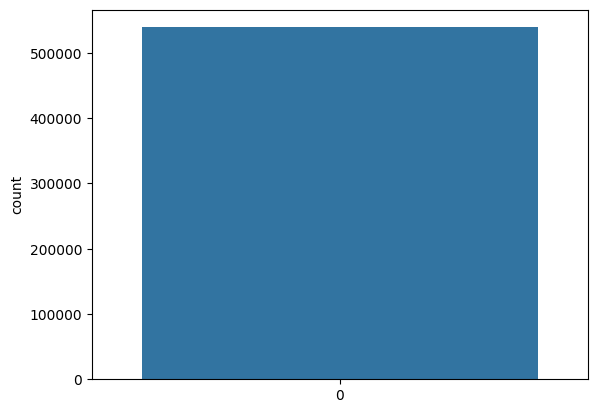

In [37]:
sns.countplot(df['Delay'])

<AxesSubplot: xlabel='Time', ylabel='Count'>

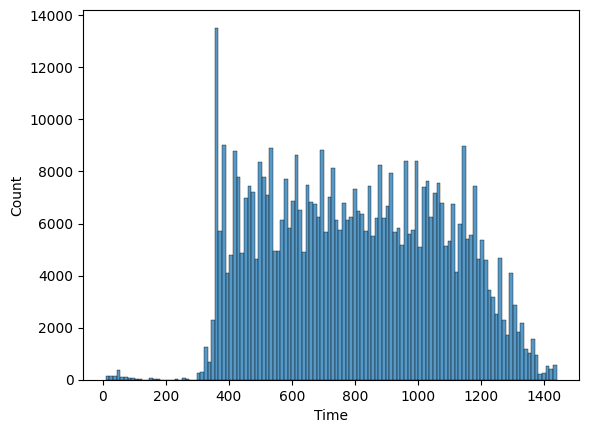

In [38]:
sns.histplot(df['Time'])

<AxesSubplot: xlabel='Length', ylabel='Count'>

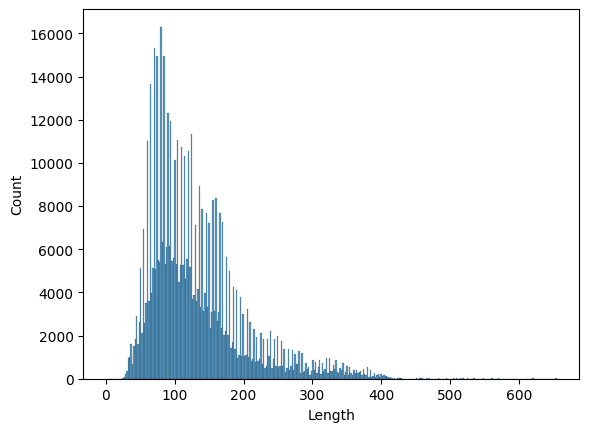

In [39]:
sns.histplot(df['Length'])

In [40]:
df['Length_by_hours'] = df['Length'] / 60
df['Time_by_hour'] = df['Time'] / 60

<AxesSubplot: xlabel='Time_by_hour', ylabel='Count'>

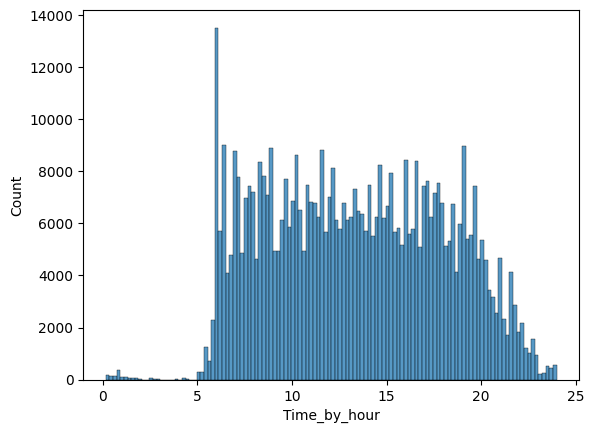

In [41]:
df.drop(columns=['Length', 'Time', 'id'], inplace=True)
sns.histplot(df['Time_by_hour'])

<AxesSubplot: xlabel='Length_by_hours', ylabel='Count'>

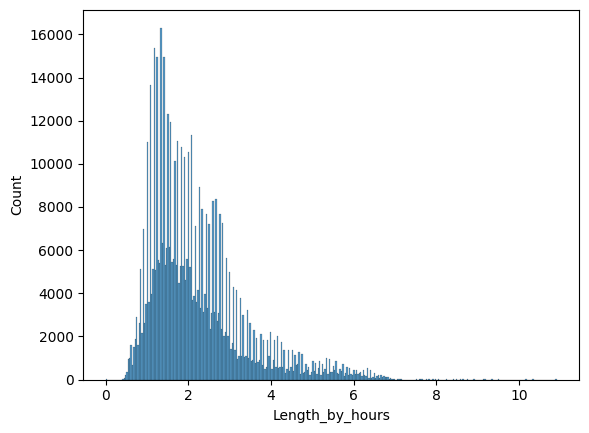

In [42]:
sns.histplot(df['Length_by_hours'])

In [43]:
#0 --> Morning | 1 --> Afternoon | 2 --> Evening | 3 --> Night
departure_period = []
for i in range(0,len(df)):
    if ((df['Time_by_hour'][i] >= 5) & (df['Time_by_hour'][i] < 12)):
        departure_period.append(0)
    elif ((df['Time_by_hour'][i] >= 12) & (df['Time_by_hour'][i] < 17)):
        departure_period.append(1)
    elif ((df['Time_by_hour'][i] >= 17) & (df['Time_by_hour'][i] < 21)):
        departure_period.append(2)
    else:
        departure_period.append(3)

df['Departure_period'] = departure_period

In [44]:
df['Departure_period'].value_counts()

0    223289
1    170239
2    120044
3     25811
Name: Departure_period, dtype: int64

In [45]:
# 0 --> not holiday | 1 --> holiday
holiday = []
for i in range(0,len(df)):
    if ((df['DayOfWeek'][i] == 6) | (df['DayOfWeek'][i] == 7)):
        holiday.append(1)
    else:
        holiday.append(0)

df['Holiday'] = holiday

In [46]:
df['Holiday'].value_counts()

0    410548
1    128835
Name: Holiday, dtype: int64

In [47]:
arrival_time = []
for i in range(0,len(df)):
    if ((df['Time_by_hour'][i] + df['Length_by_hours'][i]) >=24):
        arrival_time.append((df['Time_by_hour'][i] + df['Length_by_hours'][i])-24)
    else:
        arrival_time.append(df['Time_by_hour'][i] + df['Length_by_hours'][i])

df['Arrival_Time'] = arrival_time

In [48]:
arrival_period = []
for i in range(0,len(df)):
    if ((df['Arrival_Time'][i] >= 5) & (df['Arrival_Time'][i] < 12)):
        arrival_period.append(0)
    elif ((df['Arrival_Time'][i] >= 12) & (df['Arrival_Time'][i] < 17)):
        arrival_period.append(1)
    elif ((df['Arrival_Time'][i] >= 17) & (df['Arrival_Time'][i] < 21)):
        arrival_period.append(2)
    else:
        arrival_period.append(3)

df['Arrival_period'] = arrival_period

In [49]:
df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Delay,Length_by_hours,Time_by_hour,Departure_period,Holiday,Arrival_Time,Arrival_period
0,4,269,253,135,3,1,3.416667,0.250000,3,0,3.666667,3
1,14,1558,217,60,3,1,3.700000,0.250000,3,0,3.950000,3
2,1,2400,154,80,3,1,2.750000,0.333333,3,0,3.083333,3
3,1,2466,253,80,3,1,3.250000,0.333333,3,0,3.583333,3
4,2,108,14,252,3,0,3.366667,0.500000,3,0,3.866667,3
...,...,...,...,...,...,...,...,...,...,...,...,...
539378,4,178,203,264,5,0,5.433333,23.983333,3,0,5.416667,0
539379,8,398,252,16,5,0,5.083333,23.983333,3,0,5.066667,0
539380,8,609,253,184,5,0,4.250000,23.983333,3,0,4.233333,3
539381,13,78,128,253,5,1,5.216667,23.983333,3,0,5.200000,0


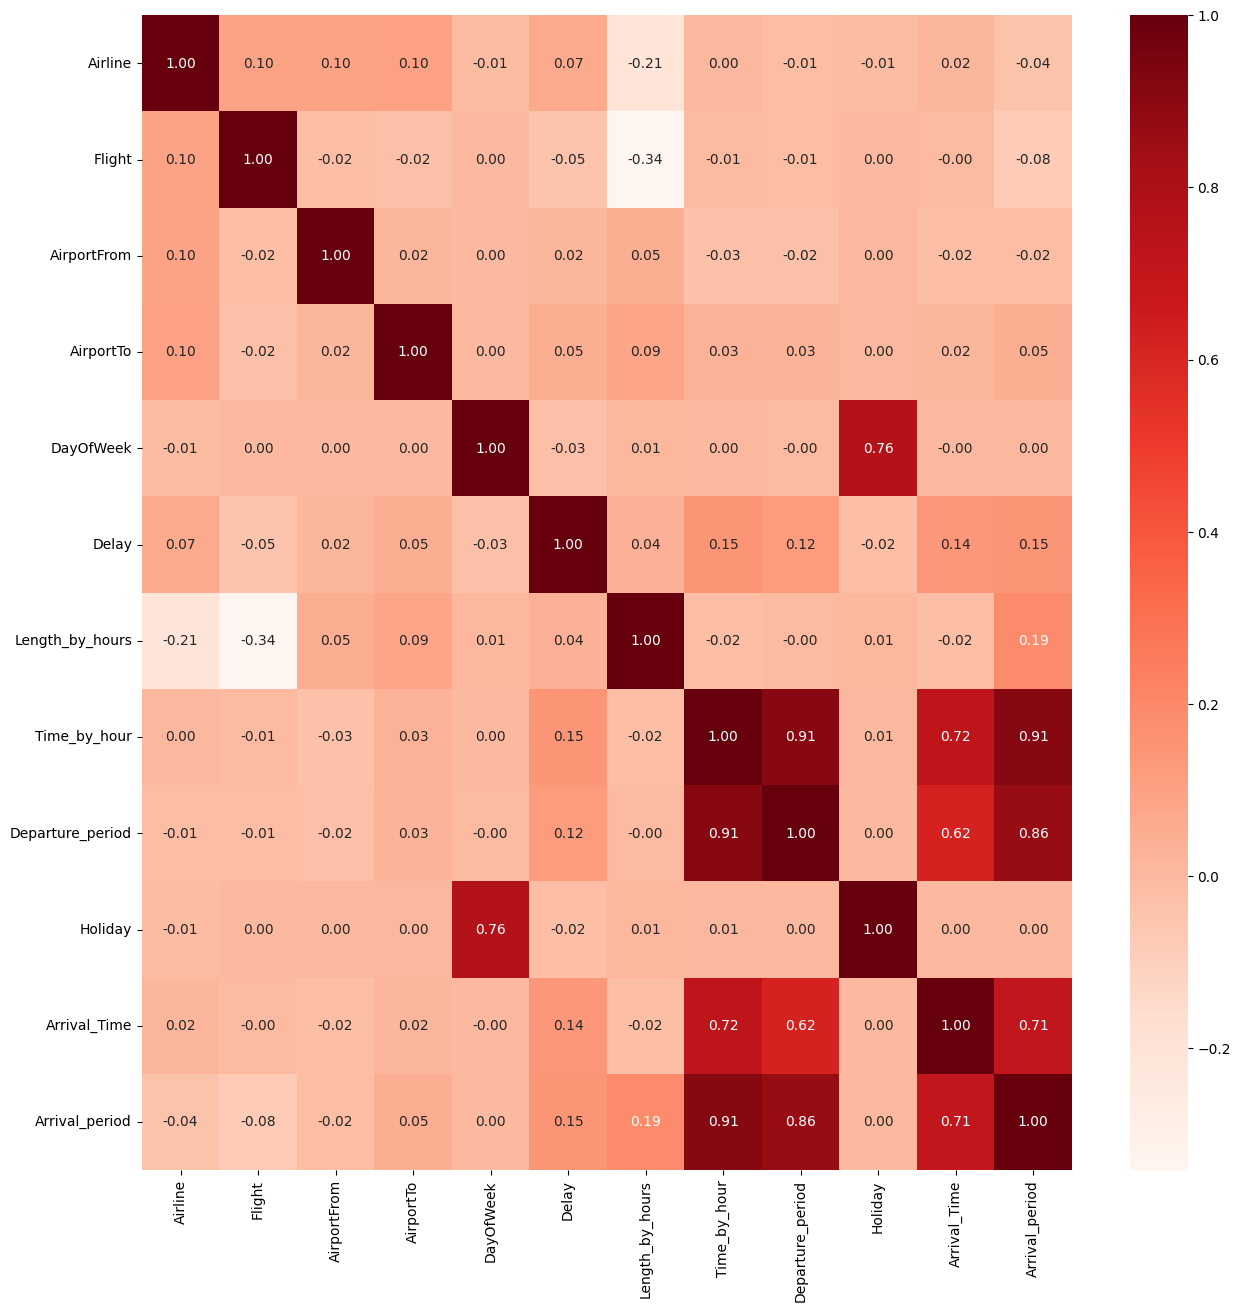

In [50]:
plt.figure(figsize=(15,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

In [51]:
X = df.drop(columns='Delay')
y = df['Delay']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True)

In [53]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='entropy',max_depth=16,random_state=40)
DecisionTreeClassifierModel.fit(X_train, y_train)

print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))

DecisionTreeClassifierModel Train Score is :  0.6987273506315868
DecisionTreeClassifierModel Test Score is :  0.6497339587311592


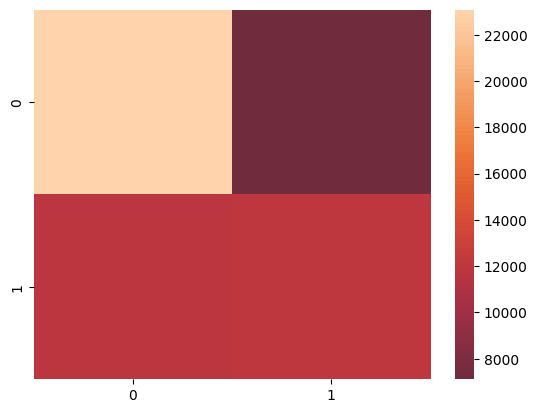

Confusion Matrix is
 [[23083  7113]
 [11780 11963]]


In [54]:
y_pred_DT = DecisionTreeClassifierModel.predict(X_test)

CM_DT = confusion_matrix(y_test, y_pred_DT)
sns.heatmap(CM_DT, center=True)
plt.show()

print('Confusion Matrix is\n', CM_DT)

In [55]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'entropy', max_depth=18, n_estimators=400, random_state=44)
RandomForestClassifierModel.fit(X_train, y_train)

print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))

RandomForestClassifierModel Train Score is :  0.7553703413782022
RandomForestClassifierModel Test Score is :  0.6654925007879271


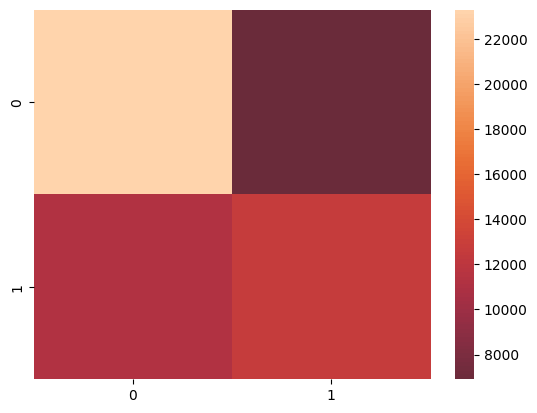

Confusion Matrix is
 [[23293  6903]
 [11140 12603]]


In [56]:
y_pred_RF = RandomForestClassifierModel.predict(X_test)
CM_RF = confusion_matrix(y_test, y_pred_RF)

sns.heatmap(CM_RF, center=True)
plt.show()

print('Confusion Matrix is\n', CM_RF)

In [57]:
GBCModel = GradientBoostingClassifier(n_estimators=300, max_depth=8, learning_rate=0.25, random_state=44)
GBCModel.fit(X_train, y_train)
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))

GBCModel Train Score is :  0.7346861841942633
GBCModel Test Score is :  0.6692560114203081


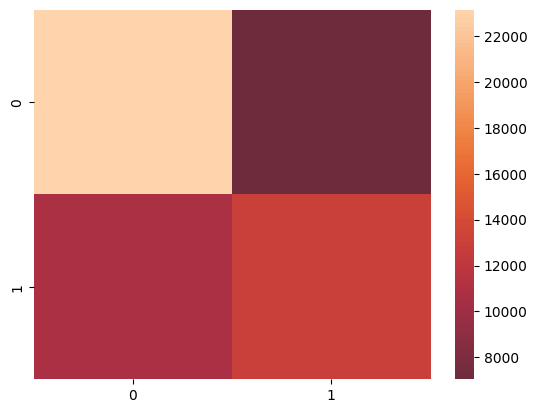

Confusion Matrix is
 [[23156  7040]
 [10800 12943]]


In [58]:
y_pred_GB = GBCModel.predict(X_test)
CM_GB = confusion_matrix(y_test, y_pred_GB)

sns.heatmap(CM_GB, center=True)
plt.show()

print('Confusion Matrix is\n', CM_GB)

In [59]:
VotingClassifierModel = VotingClassifier(estimators=[('GBCModel',GBCModel),
                                                     ('RFCModel',RandomForestClassifierModel),
                                                     ('TDCModel',DecisionTreeClassifierModel)],
                                         voting='hard')
VotingClassifierModel.fit(X_train, y_train)
print('VotingClassifierModel Train Score is : ' , VotingClassifierModel.score(X_train, y_train))
print('VotingClassifierModel Test Score is : ' , VotingClassifierModel.score(X_test, y_test))


VotingClassifierModel Train Score is :  0.7423472120368158
VotingClassifierModel Test Score is :  0.6682178015906858


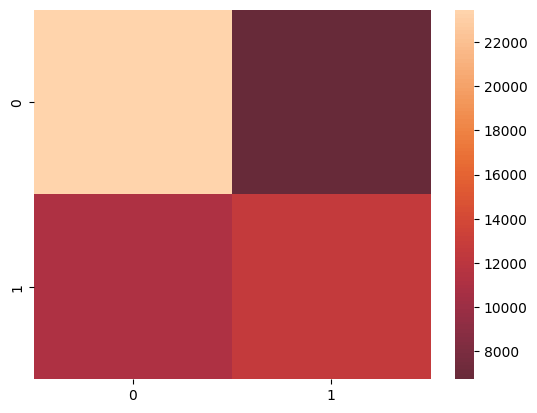

Confusion Matrix is
 [[23460  6736]
 [11160 12583]]


In [60]:
y_pred_V = VotingClassifierModel.predict(X_test)
CM_V = confusion_matrix(y_test, y_pred_V)
sns.heatmap(CM_V, center=True)
plt.show()
print('Confusion Matrix is\n', CM_V)